# The Solow model with fixed and exhaustible resources

Imports and set magics:

In [31]:
import numpy as np
from scipy import optimize
import sympy as sm
import time            # for timing the code
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 8]  # sets the default figure size


# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
from modelproject import Solow
from modelproject import analytical

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Introduction

In this project we first start out by considering an extended Solow model with a fixed input.  
An example of a fixed input could be land

Later we extend the model to include an exhaistible resource as well.

## The standard Solow model

To remind the reader we here present relevant equations for the standard Solow model, which will later be used as a baseline to compare with the extended Solow model.

The production function is a Cobb-Douglas:
$$Y_t=K_t^\alpha (A_tL_t)^{1-\alpha},\quad \alpha>0$$
The transition equation for capital-output is given by:
$$z_{t+1}=\frac{(s_Y+(1-\delta)z_t)^{1-\alpha}}{((1+g)(1+n))^{1-\alpha}}z_t^\alpha$$
And the steady state for the capital-output ratio is:
$$z^\star=\frac{s_Y}{((1+g)(1+n))^{\frac{\beta}{1-\alpha}}-(1-\delta)}$$

# The Solow Model with land.

We first consider the Solow model with land.  
The model can be descripted by the following equations:

$$Y_t=K_t^\alpha  X^\kappa (A_tL_t)^{1-\alpha-\kappa}, \quad \alpha,\kappa>0$$
$$K_{t+1}=s_YY_t+(1-\delta)K_t$$
$$L_{t+1}=(1+n)L_t$$
$$A_{t+1}=(1+g)A_t$$

Here the variables are:
- $Y_t$: Production/Output
- $K_t$: Capital
- $X$: Land
- $L_t$: Labor
- $A_t$: Technology growth


$s_Y$ is the savings rate of capital, while n and g are the growth of labor and technology respectively.  

## Analytical solution

We evalute the steady state based on the capital-output ration:
$$z_t\equiv\frac{K_t}{Y_t}=\frac{k_t}{y_t}$$
We start from the next period and insert the prodution function:
$$z_{t+1}=\frac{K_{t+1}}{Y_{t+1}}=\frac{K_{t+1}}{K_{t+1}^\alpha X^\kappa(A_{t+1}L_{t+1})^{1-\alpha-\kappa}}=\frac{K_{t+1}^{1-\alpha}}{X^\kappa(A_{t+1}L_{t+1})^{1-\alpha-\kappa}}$$
We insert the capital accumulation equation:
$$z_{t+1}=\frac{(s_YY_t+(1-\delta)K_t)^{1-\alpha}}{X^\kappa(A_{t+1}L_{t+1})}=\frac{(s+z_t(1-\delta))^{1-\alpha}}{X^\kappa(A_{t+1}L_{t+1})^{1-\alpha-\kappa}}Y_t^{1-\alpha}$$
$$=\frac{(s+z_t(1-\delta))^{1-\alpha}}{((1+g)(1+n))^{1-\alpha-\kappa}X^\kappa(A_{t}L_{t})^{1-\alpha-\kappa}}Y_t^{1-\alpha}$$
Trick: We now multiply and divide by $K_t^\alpha$
$$=\frac{(s+z_t(1-\delta))^{1-\alpha}}{((1+g)(1+n))^{1-\alpha-\kappa}X^\kappa(A_{t}L_{t})^{1-\alpha-\kappa}}Y_t^{1-\alpha}\frac{K_t^\alpha}{K_t^\alpha}$$
$$=\frac{(s+z_t(1-\delta))^{1-\alpha}}{((1+g)(1+n))^{1-\alpha-\kappa}}\frac{Y_t}{Y_t}z_t^\alpha$$
$$=\frac{(s+z_t(1-\delta))^{1-\alpha}}{((1+g)(1+n))^{1-\alpha-\kappa}}z_t^\alpha$$

In steady state we have that $z_{t+1}=z_t=z$ and we can thus use sympy to solve for z

In [32]:
analytical_ext1 = analytical(ext1 = True, ext2 = False, do_print = True)

The solution to the model with extension 1 is: z = s_Y/(delta - 1 + ((g*n + g + n + 1)**(-alpha - kappa + 1))**(-1/(alpha - 1)))


Eq(z, s_Y/(delta - 1 + ((g*n + g + n + 1)**(-alpha - kappa + 1))**(-1/(alpha - 1))))

We can also solve for the standard model using sympy:

In [33]:
analytical_standard = analytical(ext1 = False, ext2 = False, do_print = True)

The solution to the model without any extensions is: z = s_Y/(delta - 1 + ((g*n + g + n + 1)**(1 - alpha))**(-1/(alpha - 1)))


Eq(z, s_Y/(delta - 1 + ((g*n + g + n + 1)**(1 - alpha))**(-1/(alpha - 1))))

## Numerical solution

We now want to numerically solve for when the steady state is reached, i.e. when the following holds:
$$z_{t+1}-z_t=\frac{(s+z_t(1-\delta))^{1-\alpha}}{((1+g)(1+n))^{1-\alpha-\kappa}}z_t^\alpha-z_t=0$$

We consider two different solvers: bisect and brentq.
- bisect: Divides an interval into two and select the interval where the root lies. This is based on the sign of the function at the midpoint.
- brentq: Uses the secant method, which is a iterative process, that approximates the roots based on two initial guesses of function values.

In [34]:
model = Solow()     # Load in the Solow class
model.setup()       # Initialize the model

# Analytical solution for the model with land
z_sol_analytical_land = model.evaluate_ss(analytical_ext1, ext1 = True, ext2 = False, do_print = True)

# Numerical solution for the model with land
z_sol_bisect_land = model.solve_ss(method = 'bisect', ext1 = True, ext2 = False, do_print = True).root
z_sol_brentq_land = model.solve_ss(method = 'brentq', ext1 = True, ext2 = False, do_print = True).root



The analytical steady state is: z = 1.3637644468545747
The numerical steady state using bisect
      converged: True
           flag: converged
 function_calls: 48
     iterations: 46
           root: 1.3637644468540955
The numerical steady state using brentq
      converged: True
           flag: converged
 function_calls: 8
     iterations: 7
           root: 1.3637644468545789


We see that both methods, bisect and brentq, both converge close to the analytical solution. Using numpy we can set a tolerance parameter to check if we accept the precision:

In [35]:
tol = 1e-5  # Tolerance level for the numerical solutions (change if you want a higher/lower tolerance level)

print(f'Is equal to analytical Steady State: {np.isclose(z_sol_bisect_land, z_sol_analytical_land, tol)}')
print(f'Is equal to analytical Steady State: {np.isclose(z_sol_brentq_land, z_sol_analytical_land, tol)}')

Is equal to analytical Steady State: True
Is equal to analytical Steady State: True


We can also check the speed of convergence for the two types of solvers:

In [36]:
# print('bisect')
# %timeit z_sol_bisect_land = model.solve_ss(method='bisect', ext1 = True).root     
# print('brentq')
# %timeit z_sol_brentq_land = model.solve_ss(method='brentq', ext1 = True).root

So we see, that brentq is a lot quicker than bisect with a lower standard error as well.

# The Solow model with land and oil

We now extend the Solow model further by also including an exhaustible resource such as oil.
$$Y_t = K_t^\alpha(A_tL_t)^{1-\alpha-\kappa-\varepsilon}X^\kappa E_t^\varepsilon,\quad \alpha,\kappa,\varepsilon>0$$
$$K_{t+1}=s_YY_t+(1-\delta)K_t$$
$$L_{t+1}=(1+n)L_t$$
$$A_{t+1}=(1+g)A_t$$
$$E_t=s_E R_t$$
$$R_{t+1}=R_t-E_t$$

Here $R_t$ is the stock of oil, while $E_t$ is the usage of oil.  
In every period, the economy uses a share $s_E$ of the stock of oil.  
The stock of oil does not increase (e.g. no new deposits of oil are found)


## Analytical solution 

The derivation is very similar to above:
$$z_{t+1}=\frac{K_{t+1}}{Y_{t+1}}=\frac{s_Y Y_t+(1-\delta)K_t}{K_{t+1}^\alpha(A_{t+1}L_{t+1})^\beta X^\kappa E_{t+1}^\varepsilon}$$
Where $\beta=1-\alpha-\kappa-\varepsilon$  
We use that:
$$E_{t+1}=s_ER_{t+1}=s_E R_t(1-s_E)$$
Insert this, the producction function and capital accumulation:
$$z_{t+1}=\frac{\left(s_Y Y_t+K_t(1-\delta)\right)^{1-\alpha}}{\left((1+g)(1+n)\right)^\beta\left(A_tL_t\right)^\beta X^\kappa(s_E R_t(1-s_E))^\varepsilon}$$
$$=\frac{(\left(s_Y+z_t(1-\delta\right)^{1-\alpha})Y_t^{1-\alpha}}{\left((1+g)(1+n)\right)^\beta(1-s_E)^\varepsilon(A_tL_t)^\beta X^\kappa E_t^\varepsilon}\cdot\frac{K_t^\alpha}{K_t^\alpha}$$
$$=\frac{(s_Y+z_t(1-\delta)^{1-\alpha})}{((1+g)(1+n))^\beta(1-s_E)^\varepsilon}z_t^\alpha$$


Again, we can solve this for steady state using sympy:

In [37]:
analytical_ext2 = analytical(ext1 = False, ext2 = True, do_print = True)

The solution to the model with extension 2 is: z = s_Y/(delta - 1 + ((1 - s_E)**epsilon*(g*n + g + n + 1)**(-alpha - epsilon - kappa + 1))**(-1/(alpha - 1)))


Eq(z, s_Y/(delta - 1 + ((1 - s_E)**epsilon*(g*n + g + n + 1)**(-alpha - epsilon - kappa + 1))**(-1/(alpha - 1))))

## Numerical solution
The numerical solution here will closely follow the numerical analyzis above and thus few comments will be given.  
Instead we will compare all the different results in the next section 'Comparisons'

Again it needs to hold that:
$$z_{t+1}-z_t=\frac{(s_Y+z_t(1-\delta)^{1-\alpha})}{((1+g)(1+n))^\beta(1-s_E)^\varepsilon}z_t^\alpha-z_t=0$$

In [38]:
model = Solow()     # Load in the Solow class
model.setup()    # Initialize the model

# Analytical solution for the model with land and oil
z_sol_analytical_oil = model.evaluate_ss(analytical_ext2, ext1 = False, ext2 = True, do_print = True)

# Numerical solution for the model with land and oil
z_sol_bisect_oil = model.solve_ss(method = 'bisect', ext1 = False, ext2 = True, do_print = True).root
z_sol_brentq_oil = model.solve_ss(method = 'brentq', ext1 = False, ext2 = True, do_print = True).root


# Check tolerance
tol = 1e-5  # Tolerance level for the numerical solutions (change if you want a higher/lower tolerance level)
print(f'Is equal to analytical Steady State: {np.isclose(z_sol_bisect_land, z_sol_analytical_land, tol)}')
print(f'Is equal to analytical Steady State: {np.isclose(z_sol_brentq_land, z_sol_analytical_land, tol)}')

The analytical steady state is: z = 1.5575665283951123
The numerical steady state using bisect
      converged: True
           flag: converged
 function_calls: 48
     iterations: 46
           root: 1.5575665283948854
The numerical steady state using brentq
      converged: True
           flag: converged
 function_calls: 8
     iterations: 7
           root: 1.557566528395112
Is equal to analytical Steady State: True
Is equal to analytical Steady State: True


Again we see that both methods converge.  
We again check speed:

In [39]:
# print('bisect')
# %timeit z_sol_bisect_oil = model.solve_ss(method='bisect', ext2 = True).root
# print('brentq')
# %timeit z_sol_brentq_oil = model.solve_ss(method='brentq', ext2 = True).root

We again see, that it is brentq that performs best.

# Results
1. For the model with just land, the analytical solution was 1.3638, which is basically the same as the numerical answer. The difference between the analytical and numerical answers lies on the 12'th decimal, which for most practical applications is irrelavant. 
2. For the moel with both land and oil, the analytical solution was 1.5576, which is again basically what the numerical answer was. The difference between analytical and numerical again lies on the 12'th decimal, which again is irrelevant in most practical applications. 
3. The brentq method was faster than the bisect method. 

# Comparisons

#### In the following:
**If you change the number of periods, timing of shock or the shock size, you will have to restart your notebook (buton next to "Run all").  
This is because that the python-code uses the command "par = self.par", such that naming of variables might overlap.**

We first graph the model without land and oil:

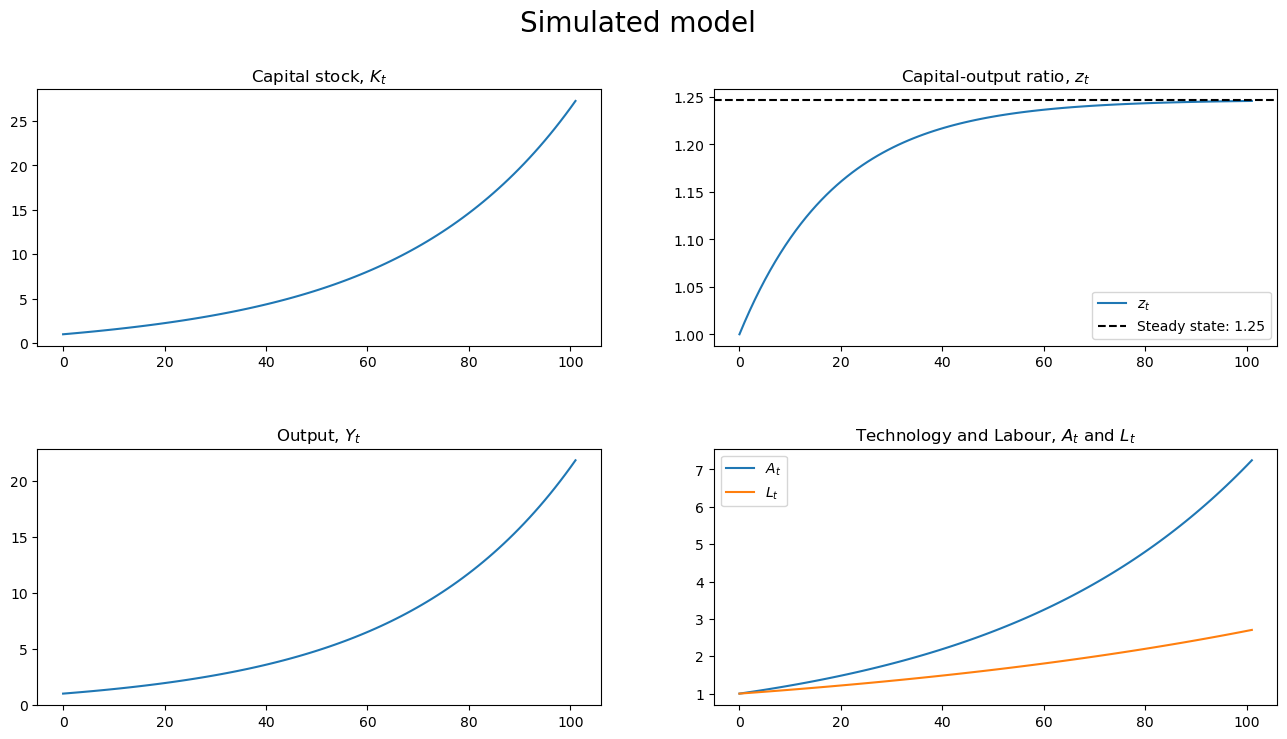

In [40]:
model.setup()    # Initialize the model

# Simulate the model WITHOUT land or oil
model.graph(periods = 100, ext1 = False, ext2 = False, shock_period = 0, shock_size = 0, do_print=True)

We then graph the model with land:

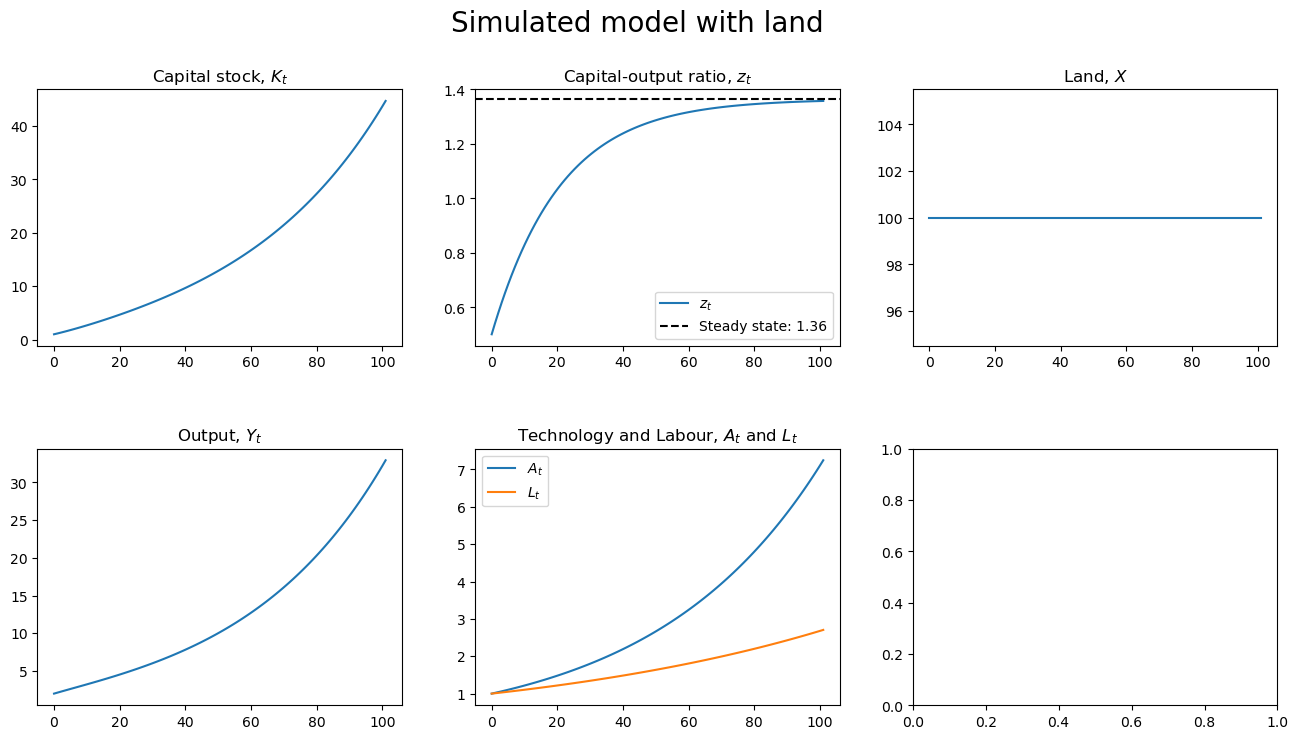

In [41]:
model.setup()    # Initialize the model

# Simulate the model WITH land and WITHOUT oil
model.graph(periods = 100, ext1 = True, ext2 = False, shock_period = 0, shock_size = 0, do_print=True)

Then the model with both land and oil:

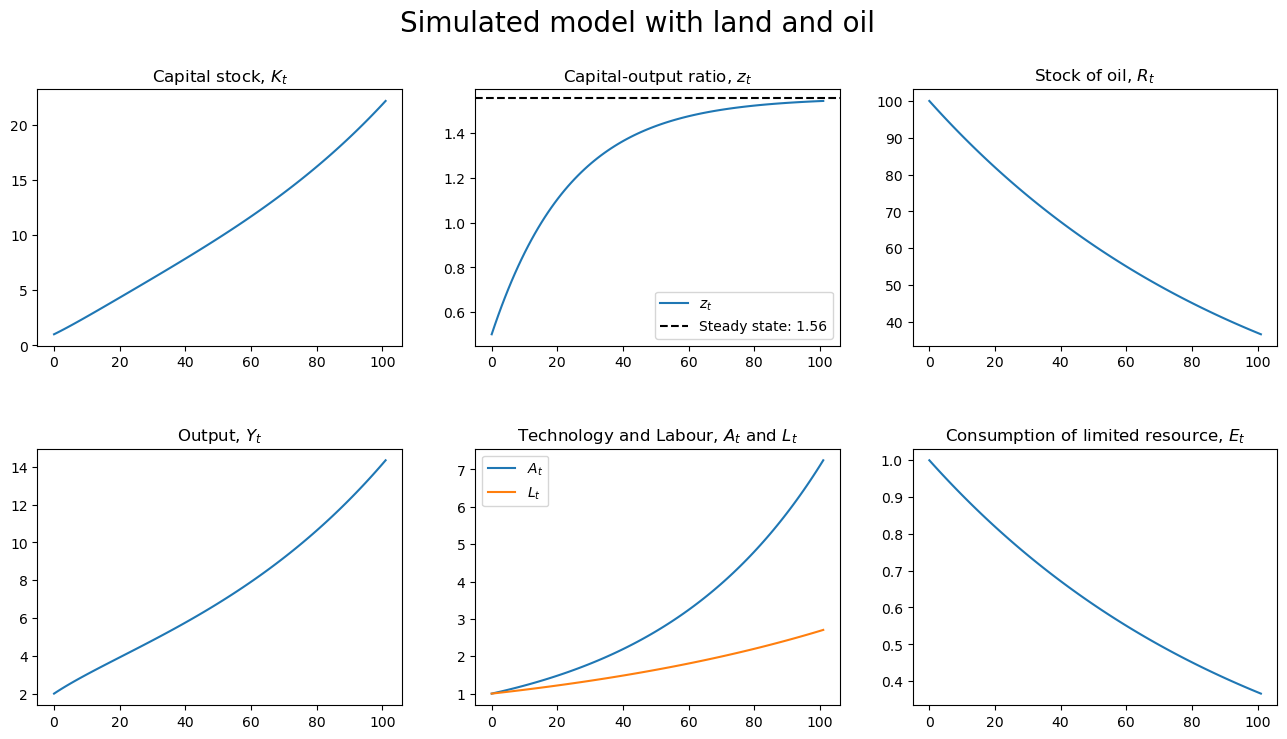

In [42]:
model.setup()    # Initialize the model

# Simulate the model WITH land AND oil
model.graph(periods = 100, ext1 = False, ext2 = True, shock_period = 0, shock_size = 0, do_print=True)

Comparing the 3 models we find that:
- There is a progression in the steady state level of the capital-output ratio. In the basic solow model, the steady state is 1.25, in the model with land it is 1.36 and in the model with land and oil it is 1.56.
- The capital stock is highest after a 100 periods in the model with land. It is higher here than the model with land and oil, since the economy in the land-oil-model faces a tradeoff between investing in capital or investing in extraction of oil.
- In the model with land, we see that land is fixed.
- In the model with land and oil, we see that oil is constantly depleating. If we were to increase the number of periods, the stock of oil and also the consumption of oil would converge towards 0.


# Shocking the model
We now look at what happens to the two models, when there is a shock to the economy.  
A shock to the economy is defined as a percentage of capital being destroyed.

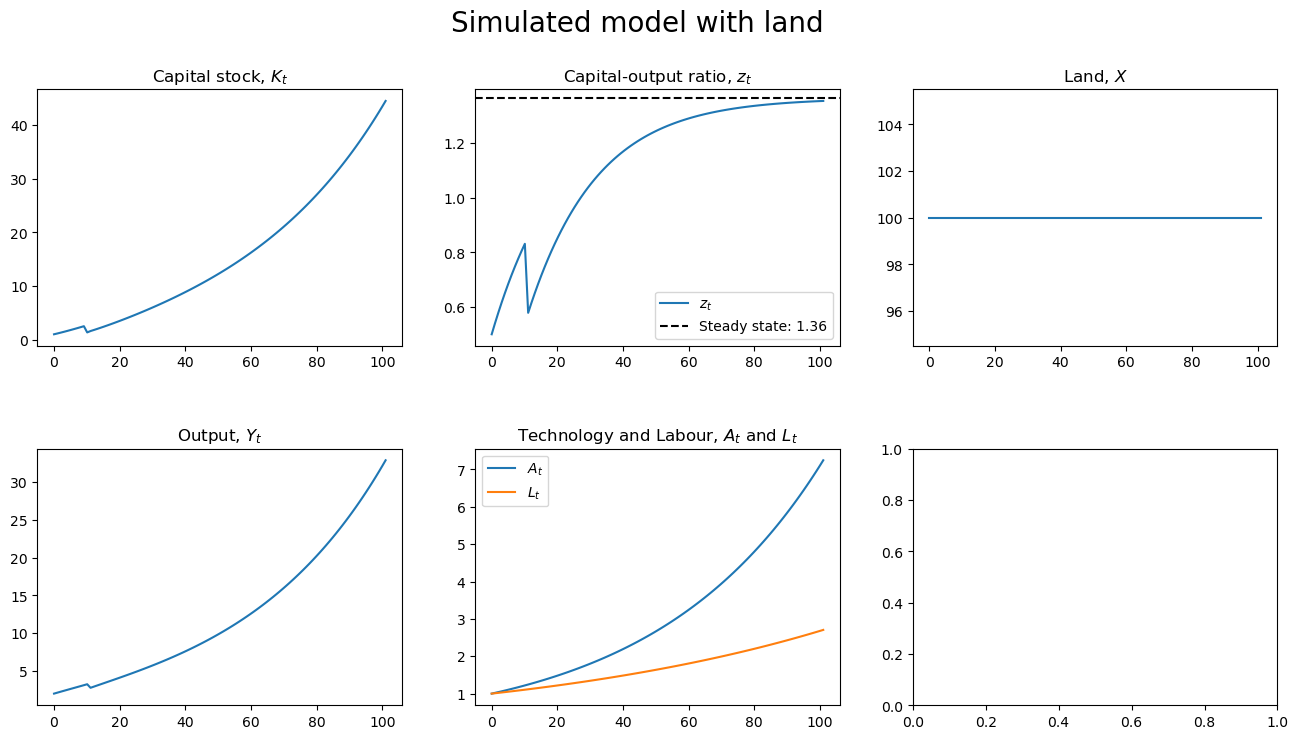

In [43]:
model.setup()    # Initialize the model

# Simulate the model WITH land and WITHOUT oil
model.graph(periods = 100, ext1 = True, ext2 = False, shock_period = 10, shock_size = 0.5, do_print=True)

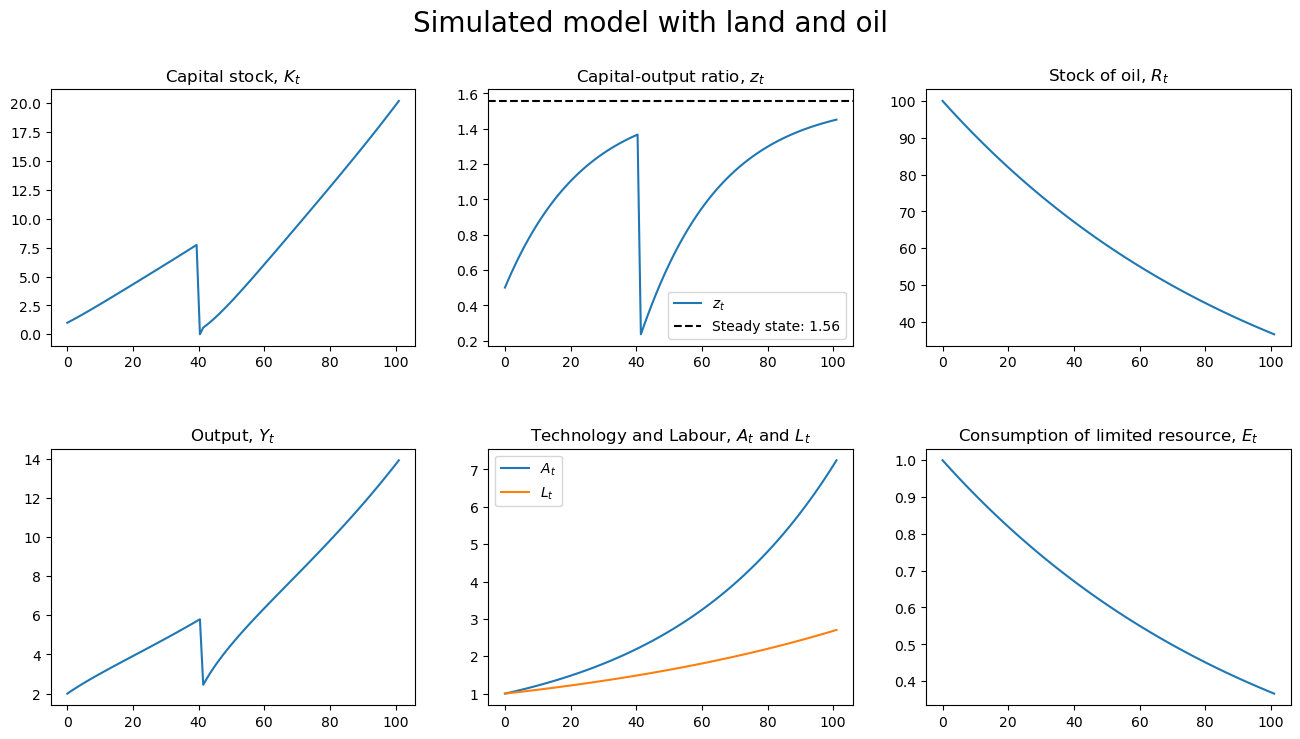

In [44]:
model.setup()    # Initialize the model

# Simulate the model WITH land AND oil
model.graph(periods = 100, ext1 = False, ext2 = True, shock_period = 40, shock_size = 1, do_print=True)

We see that even when the capital is destroyed, the economy will still go back to steady state.  
Notice also that when ALL capital is destroyed, the economy will still converge back to steady state, despite that this should not be the case with a Cobb-Douglas function.  
This is simply a consequence of the way, we have coded the model, where the shock happens after the production is finished. There is thus output left to invest in capital in the following periode and the economy will therefore "continue". 

# Conclusion

In this project we analyzed two versions of the Solow model: One where there was a fixed ressource (e.g. land) and one with both a fixed ressource and an exhaustible ressource (e.g. oil).  

We solved the model both analytically using simpy and also numerically using two different root finders. We compared the speed of these root finders and found that brentq was faster. However, when looking up the two algorithms, we found that brentq is more unreliable, since it needs a closed interval to work. However, it worked for our case.

We then drew plots of the different inputs and capital-output ratio to see the convergence.

Finally, we shocked the economy and showed, that no matter how much capital is destroyed, there will still be convergence back towards steady state, which is a consequence of the way, we have coded the model.